4. 신경망 학습

4.1. 학습이란?
    학습이란 훈련데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다.
    일단 신경망이 학습할 수 있도록 해주는 지표인 손실함수에 대하여 알아보자.

    손글씨 5를 판별한다고 생각해보자.
    인간이라면 척 보고서 바로 알겠지만
    만약 이것을 판별하는 알고리즘을 만든다고 생각해보아라.
    굉장히 복잡해질 것이다.
    따라서 우리는 이미지에서 특징을 추출하고 그특징의 패턴을 기계학습을 시키고 싶을 것이다.
    이미지의 특징은 보통 벡터로서 나타내어 진다.
    그리고 여전히 이러한 변환은 사람이 설계한다.
    -> 이미지에서 벡터로의 변환을 진행할때  적합한 특징을 쓰지 않으면 여러 지표에서 부족한 학습이 될 것 이라는 것이다.

    그림 4.2를 확인해보면 알겠지만 신경망은 다른 기계학습이나 알고리즘과 다르게 있는 그대로를 학습한다.
    이미지에 포함된 중요한 특징 조차도 기계가 스스로 학습한다는 것이다.

4.1-1. 훈련데이터와 실험 데이터
    신경망 학습을 설명하기 앞서 기계학습의 주의점을 이야기 해보자.
    훈련데이터는 최적의 매개변수를 찾는 과정이고
    실험 데이터는 구한 매개변수의 실력을 평가하는 것이다.

    그럼 왜 시험과 훈련을 구분하는 것인가?

    범용 능력을 제대로 평가하기 위해서 그런것이다.
    -> 손글씨를 구별할때 학습한 데이터 뿐만 아니라
        임의의 누군가의 글씨체를 판별할 수 있는 지를 확인하는 것이다.

    한 데이터셋에만 지나치게 최적화된 상태를 오버피팅이라고 부른다.

4.2. 손실함수
    신경망의 진행도는 손실함수를 통하여 알 수 있다.
    이 손실함수는 임의의 함수를 사용할 수도 있지만 일반적으로는 평균 제곱 오차와 교차 엔트로피 오차를 사용한다.


4.2-1. 평균 제곱 오차
    식 4.1을 보면 추정값에서 정답을 뺀뒤 제곱한 것들의 합을 절반으로 나눈 수를 의미한다.
    다음 추정값과 정답을 보자.
    출력에서는 소프트 맥스 함수를 이용하기 때문에 결과 값은 그 인덱스값이 얼마나 정답에 가까운지를 확률저긍로 나타낸다.

    0.6이 가장 크넋을 보면 2가 정답에 가장 가깝다는 것을 알 수있다.
    이게 얼마나 잘구한 건지 현재 상황은 어느정도인지를 확인하려면 평균 제곱 오차법을 사용해볼 수 있다.
    다음 구현을 확인해보자

    예1의 손실함수 값이 매우 작은 것을 확인할 수 있다.

In [139]:
import numpy as np
def mean_squared_error(y,t):
    return 0.5 *np.sum((y-t)**2)

# 정답은 2
t = [0,0,1,0,0,0,0,0,0,0]

#예1 : 2일 확률이 가장 높다고 추정함 0.6
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print(mean_squared_error(np.array(y),np.array(t)))


#예2 : 7일 확률이 가장 높다고 추정함 0.6
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print(mean_squared_error(np.array(y),np.array(t)))

0.09750000000000003
0.5975


4.2-2. 교차 엔트로피 오차
    또 다른 손실함수로서 교차 엔트로피 오차를 자주 이용한다. 
    교차 엔트로피 오차의 수식은 식4.2를 확인해보자
    예측값에 자연로그를 취하고 그 값에 예측값을 곱한 것의 합에 -를 붙여 값을 구한다.

    일단 원핫 인코딩이기 때문에 실질적으로는 정답일때의 출력으로 전체 값이 정해지게 된다.
    자연로그 함수를 확인해보자.

/var/folders/zm/91nct82j02j0xmt1jpbd7xrc0000gn/T/ipykernel_95846/2027258669.py:4: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


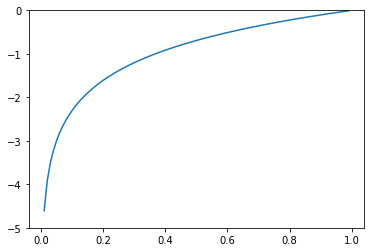

In [140]:
import matplotlib.pyplot as plt

x = np.arange(0.0,1.0,0.01)
y = np.log(x)

plt.plot(x,y)
plt.ylim(-5,0)
plt.show()


x가 0에 가까워질 수록 y값은 점점 작아진다.
반대로 출력이 커질수록 0에 가까워지며 출력이 1일때 0이된다.
이제 교차 엔트로피를 구현해보자

In [141]:
def cross_entroply_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

# 정답은 2
t = [0,0,1,0,0,0,0,0,0,0]

#예1 : 2일 확률이 가장 높다고 추정함 0.6
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print(cross_entroply_error(np.array(y),np.array(t)))


#예2 : 7일 확률이 가장 높다고 추정함 0.6
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print(cross_entroply_error(np.array(y),np.array(t)))

0.510825457099338
2.302584092994546


식을 보면 delta라는 아주 작은 값을 더해주었다. 
만약 0이 입력되게 되면 -inf가 되어 더이상 계산을 진행할 수 없는 상황이 나타난다.
이러한 상황을 방지하고자 아주 작은 값을 입력하여 이를 해결하였다.

4.2-3. 미니배치 학습

    훈련데이터로 부터 손실함수를 구하고 이를 줄이는 것이 학습이었다.
    만약 데이터가 100개가 있다면 각 데이터로부터 나온 손실함수 값을 모두 고려하여
    최대한 줄여주는 매개변수를 찾아내야 한다.
    식 4.3을 보면 기존의 교차 엔트로피 오차법에 모든 데어터들을 합한뒤 그 개수로 나눠주는 정규화 과정을 진행하였다.
    이로써 평균 손실함수를 구하는 것이다.

    하지만 6만개의 전체 데이터의 손실함수의 합을 구하려면 시간이 걸린다. 더나아가 빅데이터 수준이 되면 더 오래 거릴것이다.
    이를 해결하기 위하여 우리는 6만개의 데이터중 100장을 무작위로 뽑아서 그 100장만을 사용하여 학습하는 미니배치 학습 법을 사용할 것이다.

    랜덤함수를 통하여 batch개수만큼 index값을 뽑아낸뒤 그 index를 통하여 진행하면 된다.

In [142]:
from keras.datasets import mnist

(x_train,t_train),(x_test,t_test) = mnist.load_data()

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

한장당과 배치사이즈에 따라 오차를 구할 수 있다. 다음 코드들을 확인해보자

In [143]:
def cross_entroply_error1(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7)) / batch_size


4.3. 수치미분
    미분을 구현해보자

In [144]:
def numerical_diff1(f,x):
    h = 10e-50
    return (f(x+h) - f(x))/h


이러한 구현에는 두가지의 문제가 생긴다
파이썬에서 일정이상 작은 소수는 0.0이 되어버린다. 그러니 10^-4 정도로 조정하는 것이 필요하다
두번째로 아무리 h를 작게 한다하여도 생기는 오차값이 큰 영향을 줄것이라는 점이다.
이점을 보완하기 위하여 우리는 중심 차분 혹은 중앙 차분이라는 방식을 사용하여 다시 구현해보겠다.
참고로 위의 x+h - x는 전방 차분이라고 부른다.

In [145]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h)

예시를 가지고 더 이해해보자
식 4.5의 2차함수가 존재한다.
파이썬으로 구현하면 다음과 같다.
그리고 시각적으로 확인까지 해보자

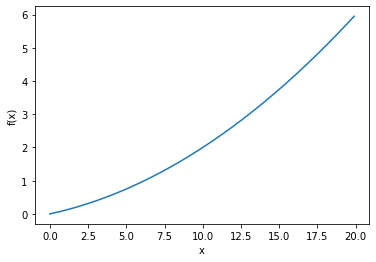

In [146]:
def function1(x):
    return 0.01*x**2 + 0.1*x
x = np.arange(0.0,20.0,0.1)
y = function1(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

그럼 이제 x = 5일때 와 10일때 이 함수의 미분을 계산해보자.

In [147]:
print(numerical_diff(function1,5))
print(numerical_diff(function1,10))

0.1999999999990898
0.2999999999986347


진정한 미분값은 0.2와 0.3이다.
완전히 일치하지만 그 오차가 매우 작음을 알 수 있다.

4.3-1. 편미분
    다음 4.6의 다변수 함수를 구현해보자
    그리고 간단히 두개의 편미분 문제를 풀어보자

In [148]:
def function2(x):
    return x[0]**2+x[1]**2

def function_tmp1(x0):
    return x0*x0 +4.0**2.0

def function_tmp2(x1):
    return 3.0**2+x1*x1

print(numerical_diff(function_tmp1,3.0))
print(numerical_diff(function_tmp2,4.0))

6.00000000000378
7.999999999999119


앞에서는 개별적으로 계산하였는데 동시에 계산하려면 어떻게 해야할까?
모든 변수의 편미분을 벡터로 정리한 것을 우리는 기울기라고 부른다.
기울기는 예를 들어 다음과 같이 구현할 수 있다.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[6. 8.]
[0. 4.]
[6. 0.]


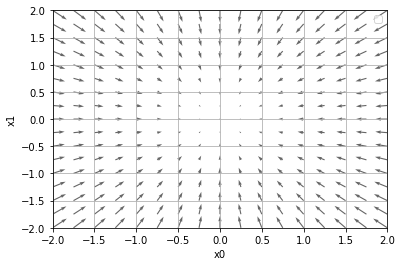

In [149]:
def numerical_gradient1(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        #f(x+h) 계산
        x[idx] = tmp_val+h
        fxh1 = f(x)
        
        #f(x-h) 계산
        x[idx] = tmp_val-h
        fxh2 = f(x)
        
        grad[idx]  = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val #값 복원
        
    return grad

def numerical_gradient_batch(f,X):
    if X.ndim == 1:
        return numerical_diff(f,X)
    else:
        grad = np.zeros_like(X)
        for idx,x in enumerate(X):
            grad[idx] = numerical_gradient1(f,X[idx])
        return grad
    
    
    
print(numerical_gradient1(function2,np.array([3.0,4.0])))
print(numerical_gradient1(function2,np.array([0.0,2.0])))
print(numerical_gradient1(function2,np.array([3.0,0.0])))


#벡터 그림 그리기
from mpl_toolkits.mplot3d import Axes3D

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient_batch(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()



다음 그림은 기울기가가리키는 쪽은 각 위치에서 함수의 출력값을 가장 크게 줄이는 방향이다.
즉 가장 효율적인 방향이라는 것이다.

4.4 경사 하강법
    2차원 같은 경우에는 가리키는 방향으로 가면 최소의 값이 존재하지만
    다변수 함수 같은 경우에는 가리키는 방향이 최솟값이 없는 경우가 대부분이다.(국소적인 최소값을 찾는다 라는 의미)

    경사법은 현 위치에서 기울어지 방향으로 일정 거리만큼 이동한다.
    그리고 그 위치에서 기울기를 구하고 그 방향으로 나아간다.
    위 2과정을 반복하면서 함수의 값을 점차 줄이는 것이 경사법이다.

    식 4.7에 경사법을 수식으로 나타내었다.

    eta는 갱신양이다. 즉 학습률이라는 것이다.
    매개변수값의 갱신야이라고 이해하면 쉬울 것 이다.

    구현해보도록 하자.

In [150]:
def gradient_descent(f,init_x,lr=0.0-1,step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -=lr*grad
    return x

x는 초기위치
step_num번 반복하면서 각 위치의 grad를 구한뒤
그것을 학습률과 곱하여 구한 값을 각 위치에서 빼면서
점차 이동한다.

이 함수를 사용하면 함수의 극솟값을 구할수 있고 잘하면 최솟값도 구할 수 있다.
그럼 다음 문제를 풀어보자.

In [151]:
init_x = np.array([-3.0,4.0])
print(gradient_descent(function2,init_x,lr = 0.1,step_num=100))


[-6.11110793e-10  8.14814391e-10]


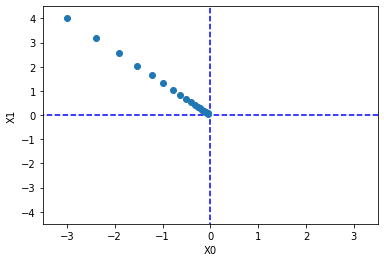

In [152]:
def gradient_descent_draw(f,init_x,lr=0.0-1,step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f,x)
        x -=lr*grad
    return x, np.array(x_history)

init_x = np.array([-3.0,4.0])
x,x_history = gradient_descent_draw(function2,init_x,lr = 0.1,step_num=20)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


초깃값 (-3.0,4.0)으로 설정한 뒤 경사법을 이용하여 최솟값 탐색을 진행하였다.
최종결과는 거의 (0,0)에 가까운 결과를 얻었다. 거의 정확한 결과를 얻은 것이다.

갱신과정을 그림을 통하여 확인해보자 그림 4-10
벡터 방향과 일치하게 정화하게 감소하는 것을 볼 수 있다.

이제는 학습률이 너무 크거나 작아지면 학습이 어떻게 진행되는지 확인해보자.

In [153]:
init_x = np.array([-3.0,4.0])
print(gradient_descent(function2,init_x,lr = 10.0,step_num=100))

init_x = np.array([-3.0,4.0])
print(gradient_descent(function2,init_x,lr = 1e-10,step_num=100))


[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


너무 큰 경우에는 발산을 해버리고
반대로 너무 작으면 거의 갱신되지 않은채 끝나버린다.

4.3-2. 신경망에서의 기울기
    이제 배운것들을 적용해보자.
    예를 들어 2X3의 형사이 있고
    가중치가 W , 손실함수가 L인 신경망을 생각해보자
    이경우 경사는 dL/dW로 나타낼 수 있다 수식은 식4.8을 확인해보자
    
    그럼 간단한 신경망을 예로 들어 실제로 기울기를 구하는 코드를 구현해보자

In [154]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    
    return y

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)  #2x3짜리 난수로 형성된 maxtrix 생성
    def predict(self,x):
        return np.dot(x,self.W)
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entroply_error(y,t)
        
        return loss

net = simpleNet()
print(net.W)

x = np.array([0.6,0.9])
p = net.predict(x)
print(p)

t = np.array([0,0,1]) #정답 레이블
print(net.loss(x,t))
        

[[ 0.18309719  1.61711214 -0.76816397]
 [ 1.1848743   0.57889556 -1.29475941]]
[ 1.17624518  1.49127329 -1.62618185]
3.6907094627991377


loss를 구해보니 굉장히 크다.
그러면 이제 갱신을 어떻게 하는지 구현해보자.

In [155]:
def f(W):
    return net.loss(x,t)

dW = numerical_gradient_batch(f,net.W)
print(dW)

[[ 0.24681503  0.33821011 -0.58502514]
 [ 0.37022255  0.50731516 -0.87753771]]


4.5 학습 알고리즘 구현
    키워드: 손실 함수, 미니배치, 기울기, 경사 하강법

    전제)
        신경망에는 적응 가능한 가중치와 편향이 존재하며, 이를 훈련 데이터에 적응하도록 조정하는 과정을 학습이라고 한다.
        학습은 다음 4과정을 통하여 수행한다.
    1단계 - 미니배치
        훈련 데이터 중 일부를 무작위로 가져온다.
        이렇게 가져온 데이터를 미니배치라고 하며, 소실 함수값을 줄이는 것이 목표이다.
    2단계 - 기울기 산출
        미니 배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.
        기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시합니다.
    3단계 - 매개변수 갱신
        가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
    4단계 - 반복
        1~3단계를 최솟값을 찾을 때 까지 진행한다.


데이터를 미니배치로 무작위로 선정하기 때문에 확률적 경사 하강법이라고 부른다.
확률적으로 무작위로 골라낸 데이터 에대하여 수행하는 경사 하강법이라는 의미이다.
줄여서 SDG라고 한다.

그럼 실제로 손글씨 숫자를 학습하는 신경망을 구현 할 것이다.
여기에서는 2층 신경망을 대상으로 MNIST데이터셋을 사용하여 학습을 수행할 것이다. (은닉층 1개)

In [163]:
def sigmoid(x):
    sig = np.where(x<0,np.exp(x)/(1+np.exp(x)) ,1/(1+np.exp(-x)))
    return sig

class TwoLayerNet:
    def __init__ (self, input_size,hidden_size,output_size,weight_init_std=0.01):
        
        # 가중치 초기화 
        self.params = {}
        self.params['W1'] = weight_init_std *\
                            np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        
        self.params['W2'] = weight_init_std *\
                            np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)
        
    
    def predict(self,x):
        W1,W2 = self.params['W1'],self.params['W2']
        b1,b2 = self.params['b1'],self.params['b2']
        
        a1 = np.dot(x,W1)+b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2)+b2
        y = softmax(a2)
        
        return y
    
    # x :입력 데이터 t: 정답 데이터
    def loss(self,x,t):
        y = self.predict(x)
        
        return cross_entroply_error1(y,t)
    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis =1)
        t = np.argmax(t,axis =0)
        
        accuracy = np.sum(y==t) /float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self,x,t):
        loss_W = lambda W: self.loss(x,t)
        
        grads = {}
        
        grads['W1'] = numerical_gradient_batch(loss_W,self.params['W1'])
        grads['b1'] = numerical_gradient_batch(loss_W,self.params['b1'])
        grads['W2'] = numerical_gradient_batch(loss_W,self.params['W2'])
        grads['b2'] = numerical_gradient_batch(loss_W,self.params['b2'])
        
        return grads


net = TwoLayerNet(input_size=784,hidden_size=100,output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

        

(784, 100)
(100,)
(100, 10)
(10,)


In [164]:
import numpy as np
from keras.datasets import mnist

(x_train,t_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
train_loss_list = []
train_acc_list = []
test_acc_list = []



# 1에폭당 반복수
iter_per_epoch = max(train_size / batch_size,1)


#hyper params

iter_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

for i in range(iter_num):
    #미니배치 생성
    
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #기울기 계산
    grad = network.numerical_gradient(x_batch,t_batch)
    
    #매개변수 갱신
    
    for key in ('W1','b1','W2','b2'):
        network.params[key]-= learning_rate*grad[key]
    
    #학습경과 기록
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)

    if i% iter_per_epoch == 0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(test_acc)
        print(f'train acc, test acc : {train_acc} ,{test_acc}')
    
    
    
    





train acc, test acc : 0.5753833333333334 ,0.0


KeyboardInterrupt: 